c:\Users\Me\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Me\.cache\kagglehub\datasets\nicholasjhana\energy-consumption-generation-prices-and-weather\versions\1
------------------------------------------------------------------------------------------Info------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  350

None

------------------------------------------------------------------------------------------nombre de valeur nulle------------------------------------------------------------------------------------------


time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

------------------------------------------------------------------------------------------description------------------------------------------------------------------------------------------


,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,35045.000000,35045.000000,35046.000000,35045.0,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,475.577343,972.116108,2605.114735,0.0,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,792.406614,400.777536,1835.199745,0.0,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1077.250000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.000000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,616.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


------------------------------------------------------------------------------------------nombre de colonne ------------------------------------------------------------------------------------------


19

------------------------------------------------------------------------------------------nombre de valeur nulle------------------------------------------------------------------------------------------


time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

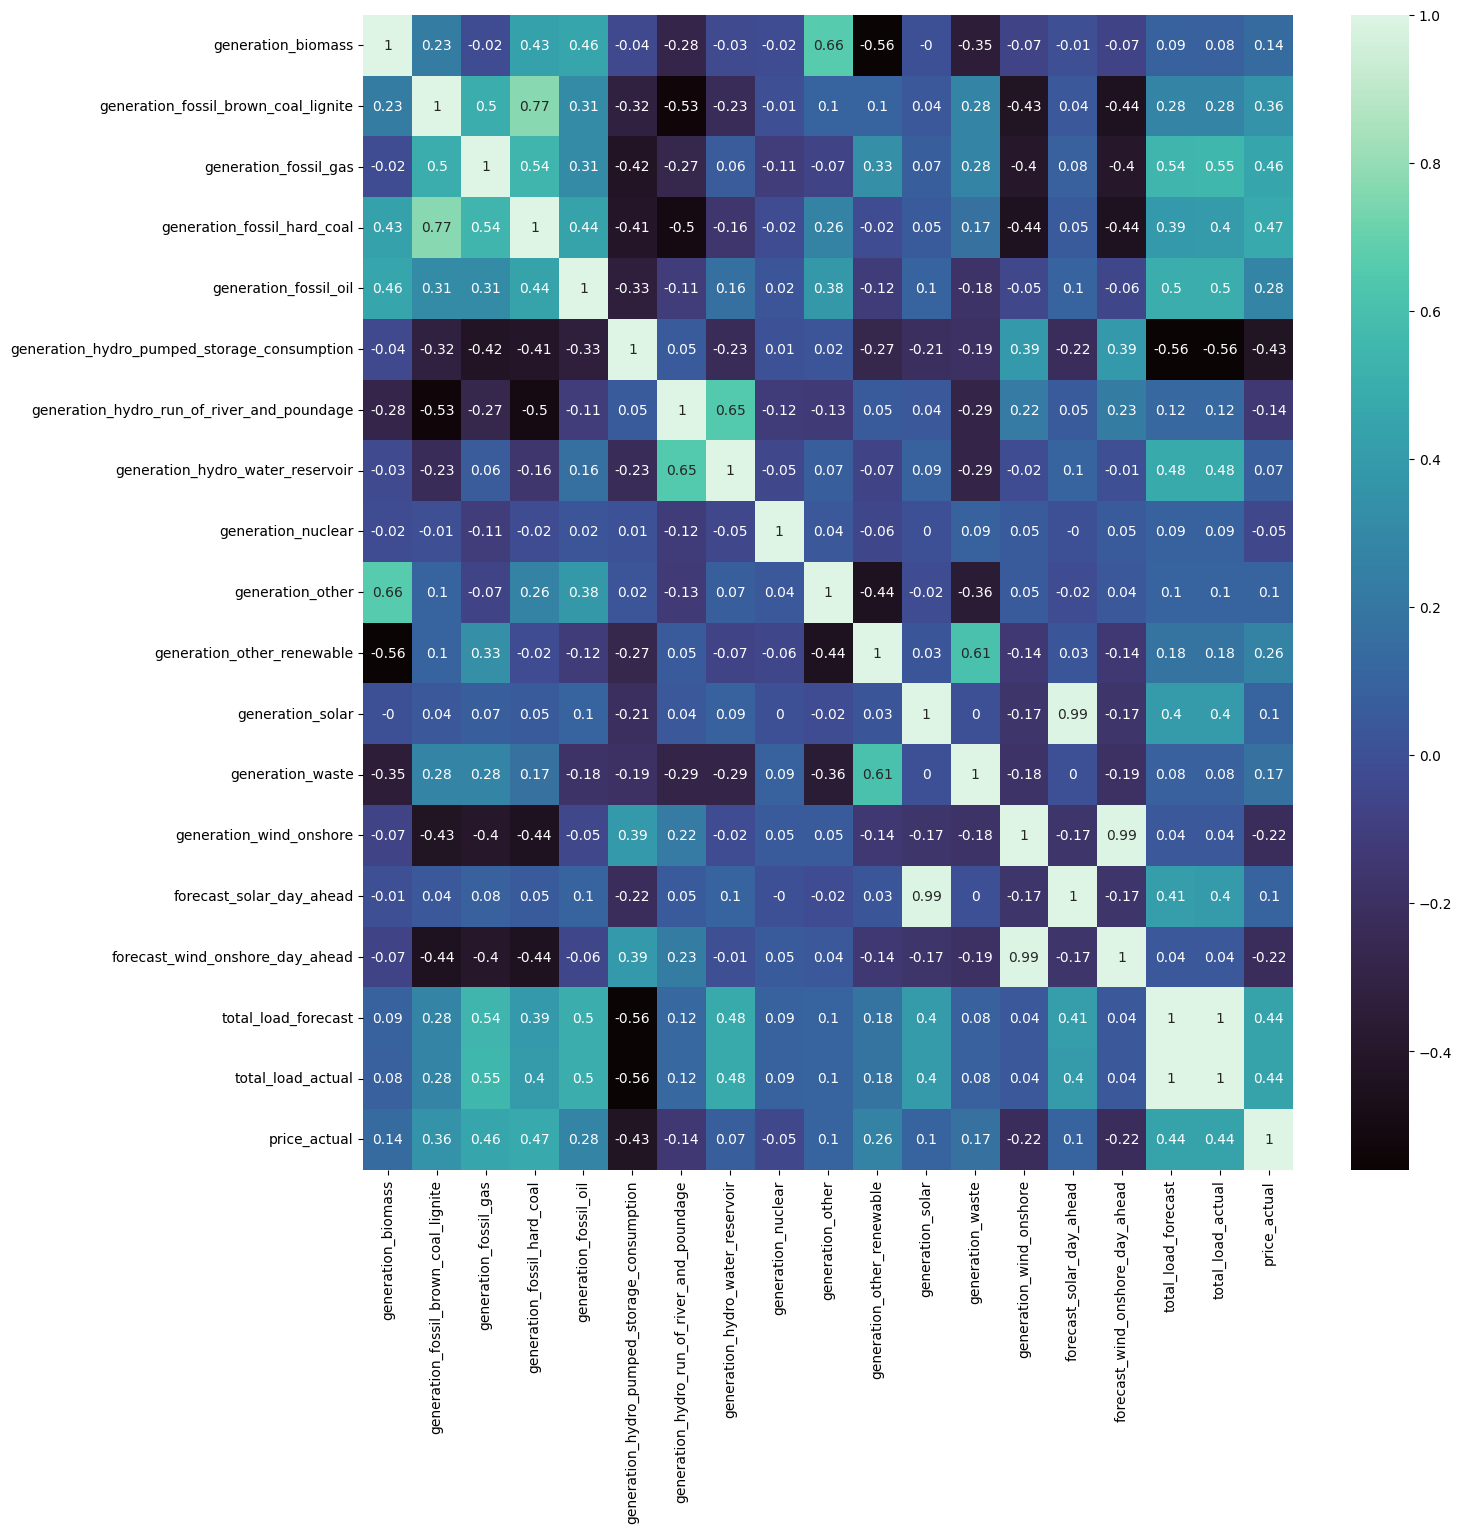

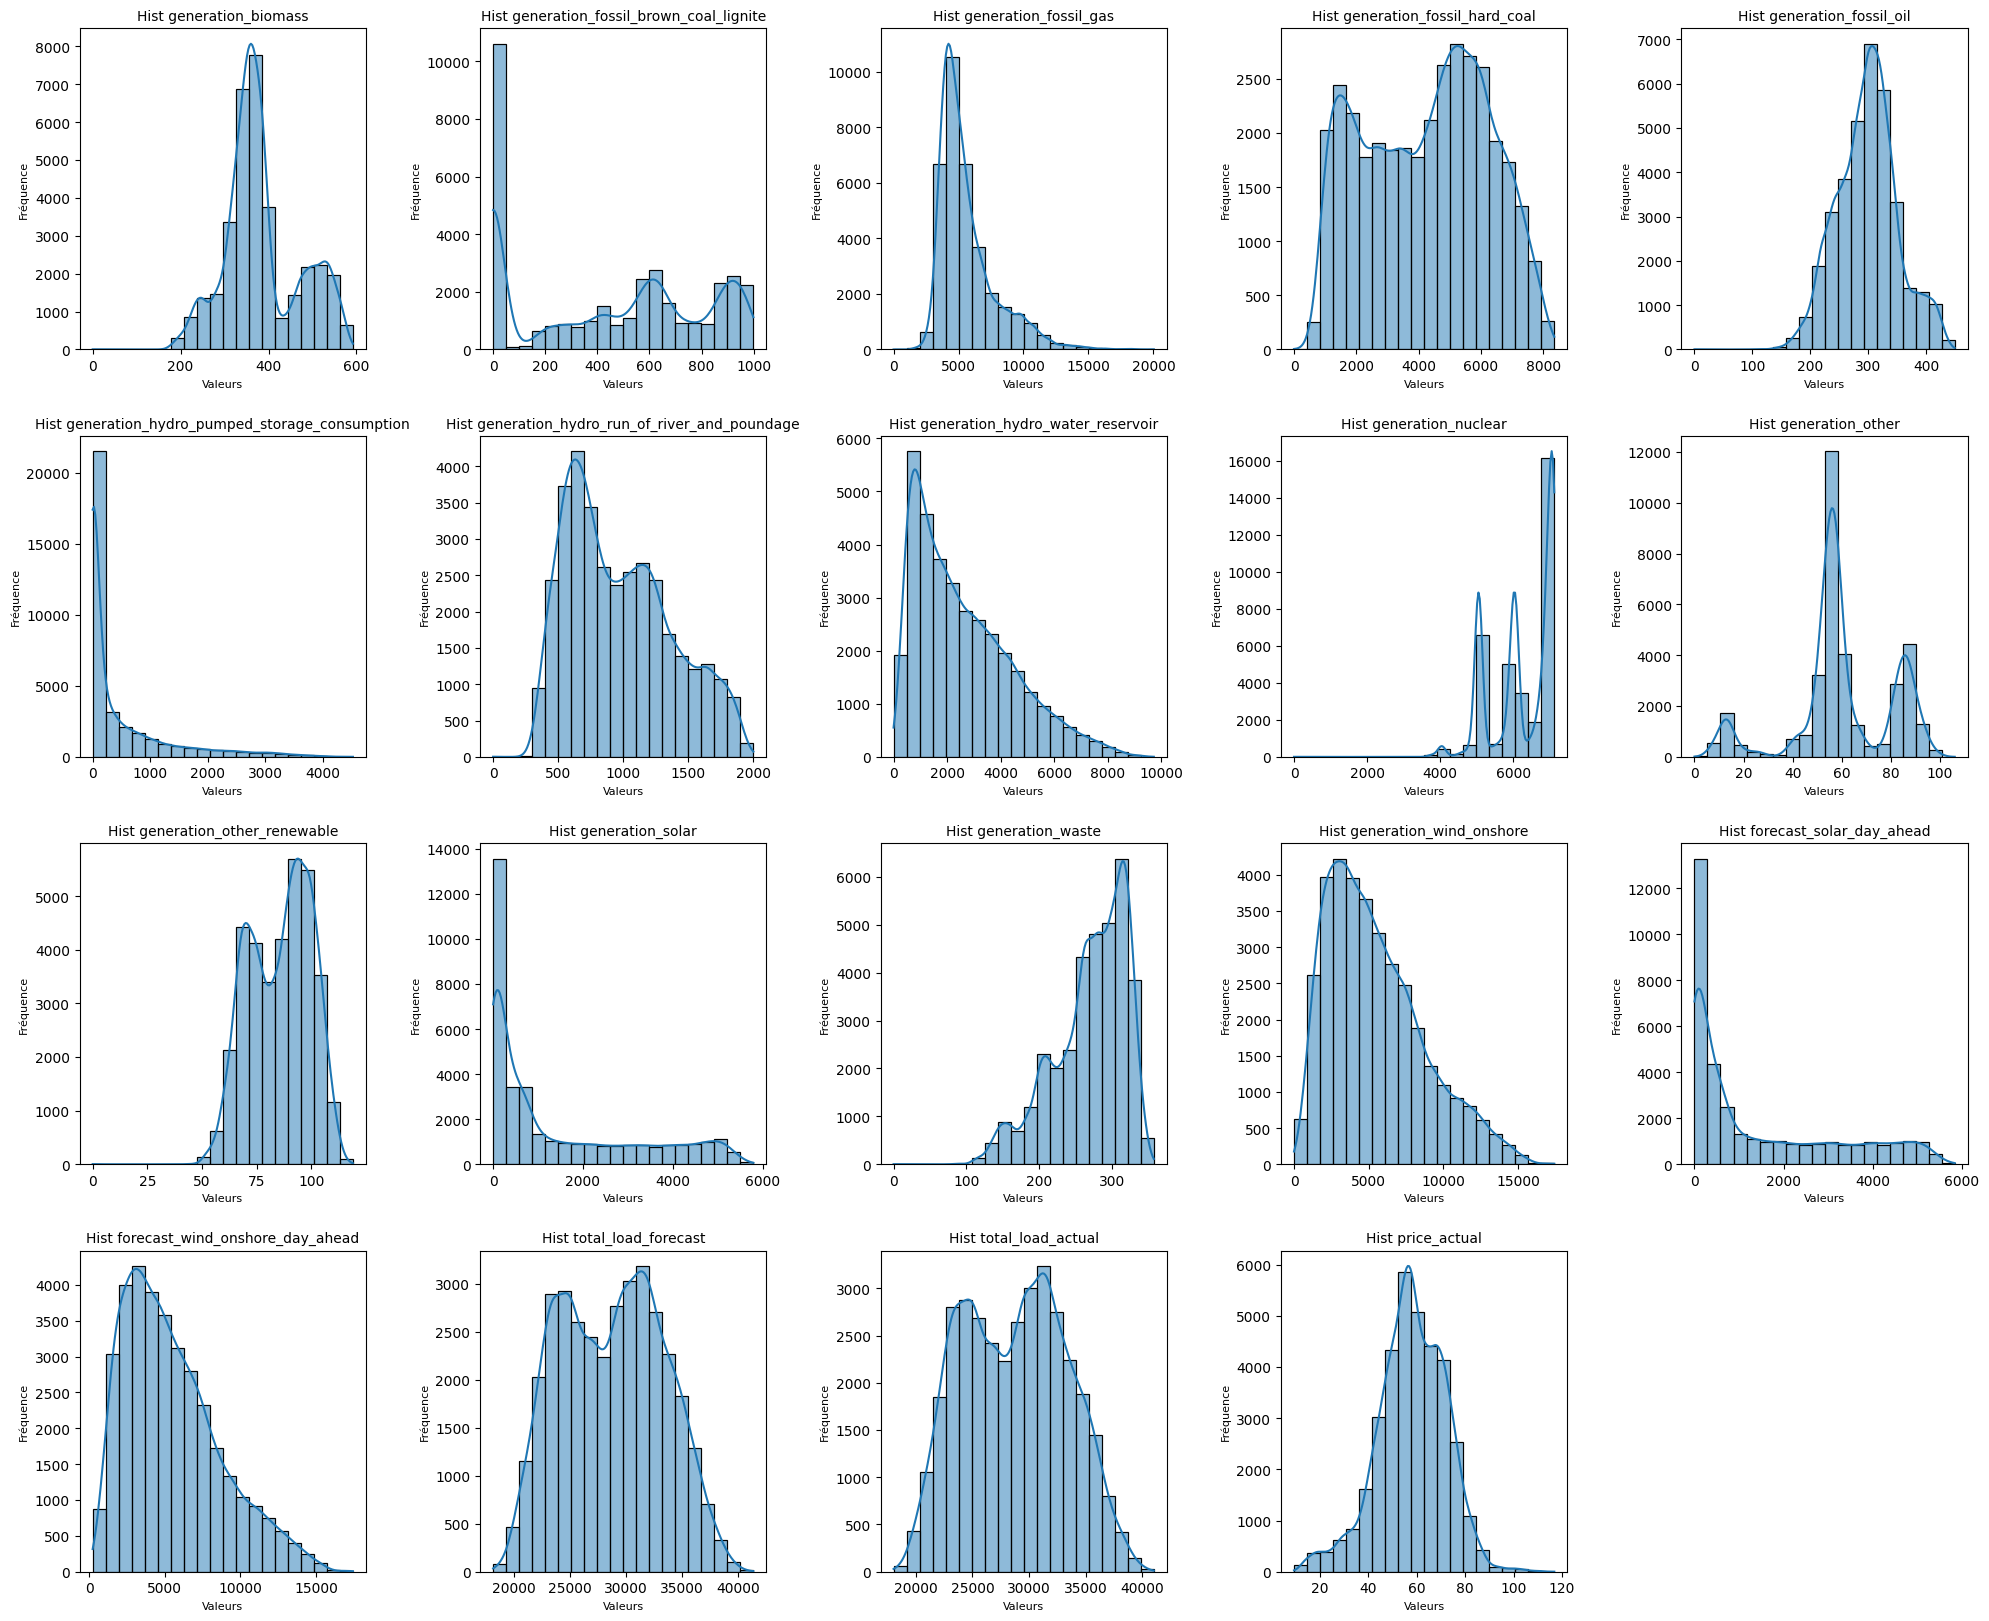

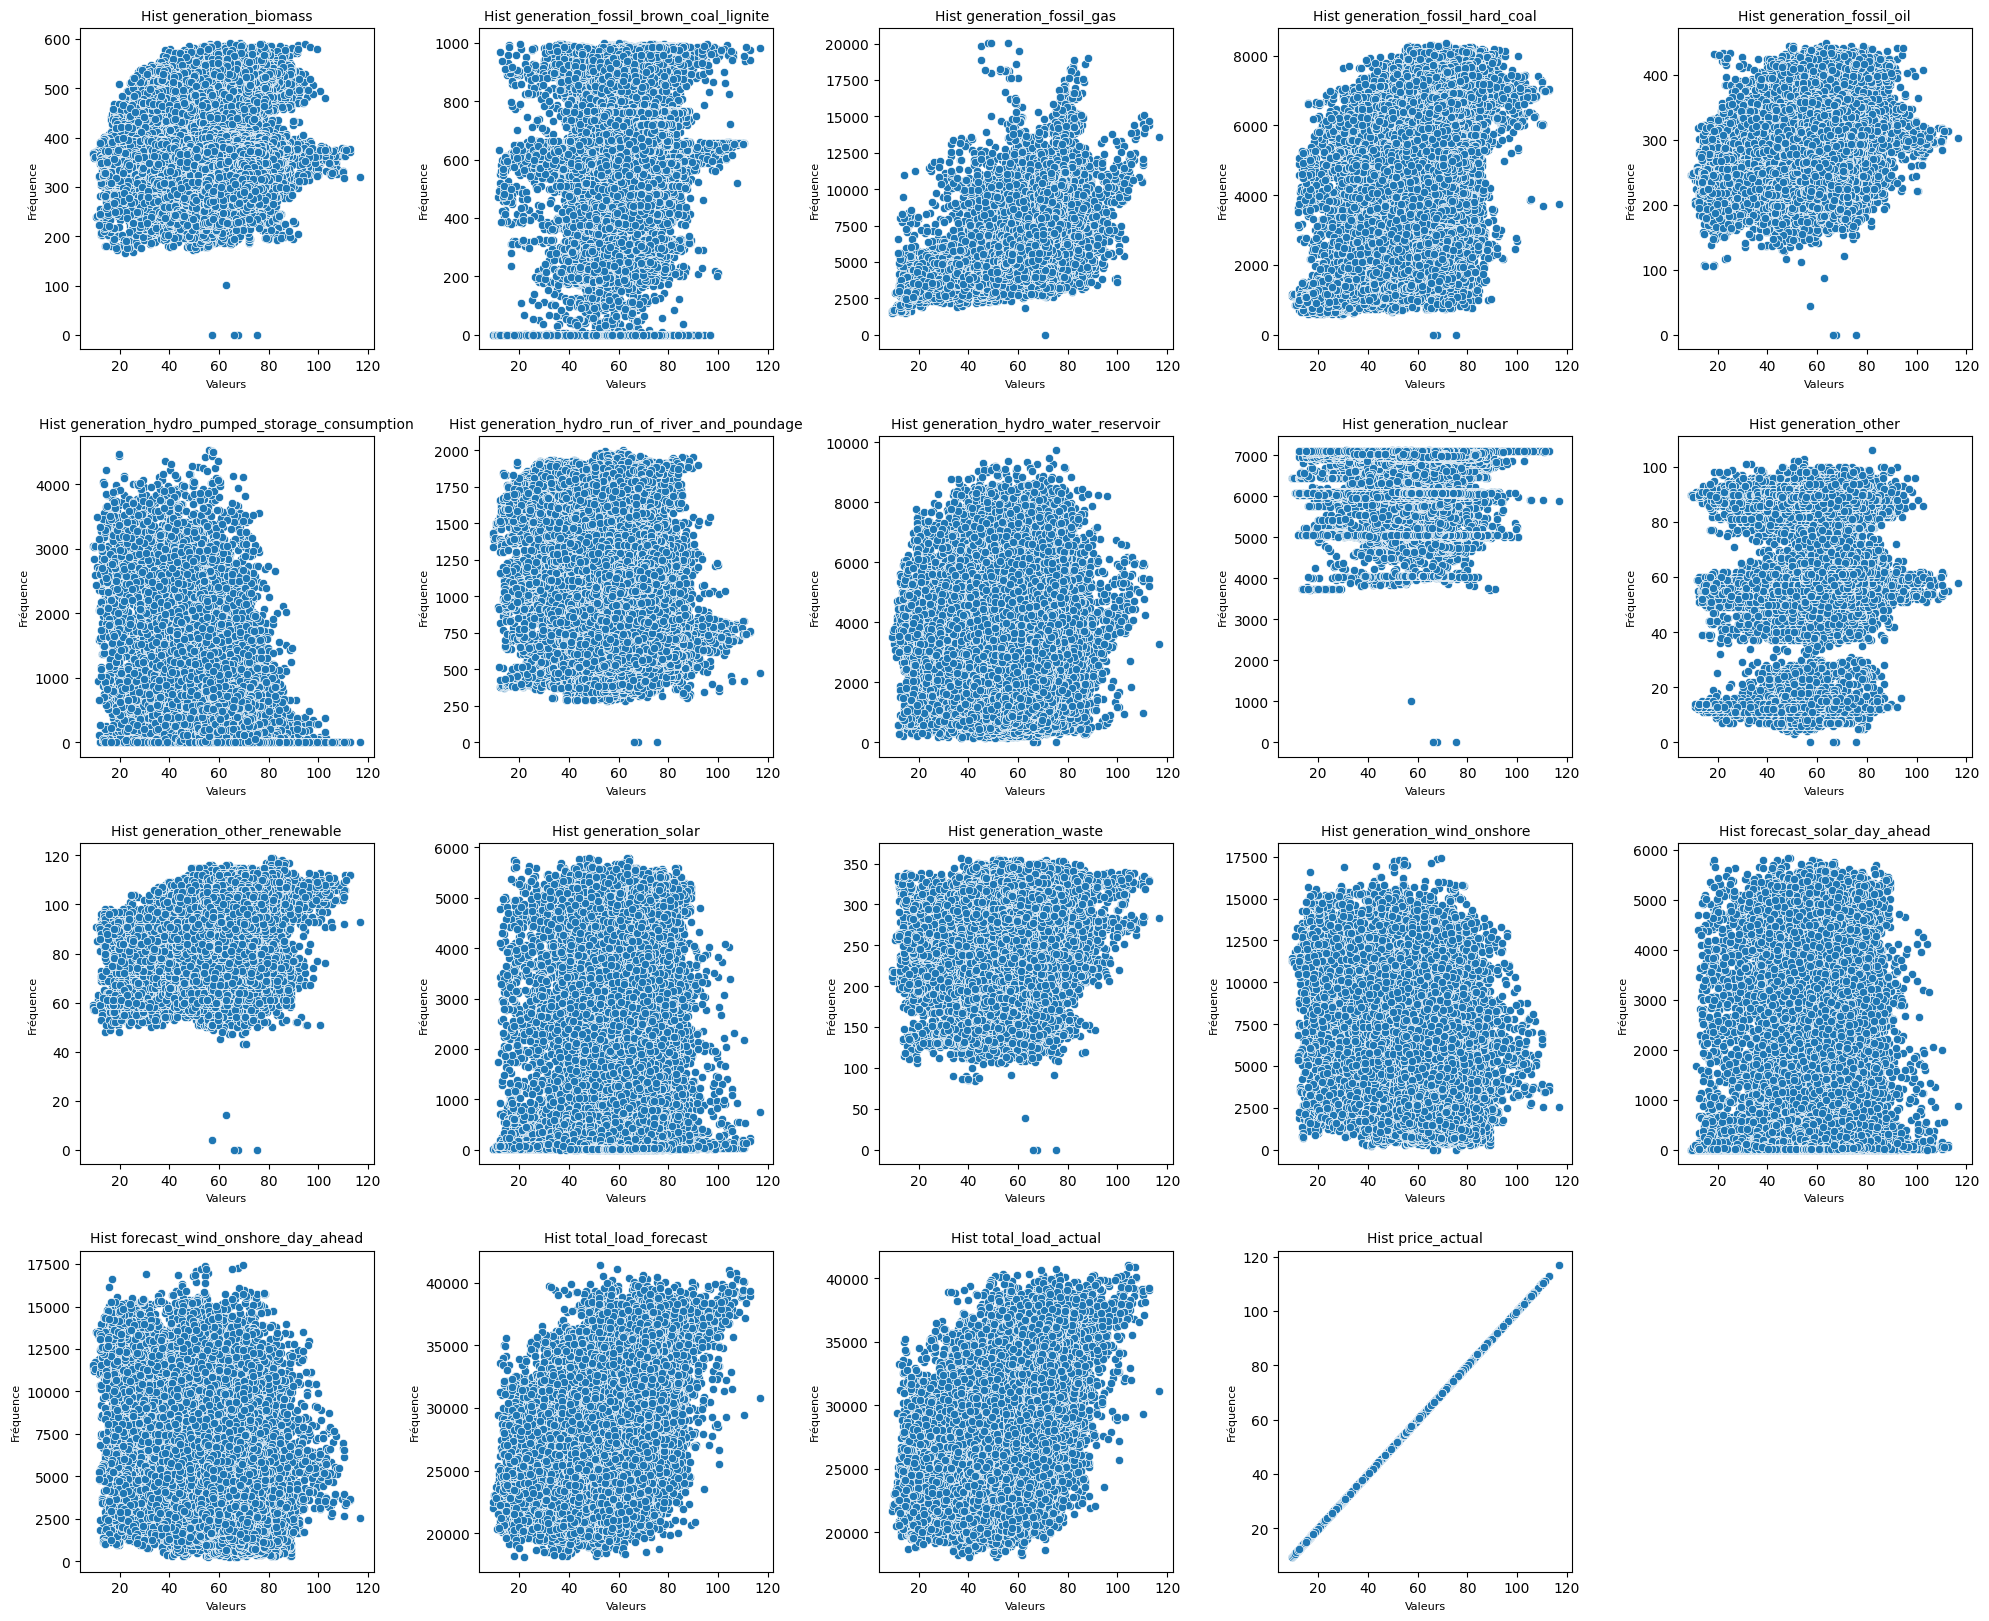

categorical columns : []
numerical columns : ['generation_biomass', 'generation_fossil_brown_coal_lignite', 'generation_fossil_gas', 'generation_fossil_hard_coal', 'generation_fossil_oil', 'generation_hydro_pumped_storage_consumption', 'generation_hydro_run_of_river_and_poundage', 'generation_hydro_water_reservoir', 'generation_nuclear', 'generation_other', 'generation_other_renewable', 'generation_solar', 'generation_waste', 'generation_wind_onshore', 'forecast_solar_day_ahead', 'forecast_wind_onshore_day_ahead', 'total_load_forecast', 'total_load_actual']
RMSE:  11.33
R2:  0.38
MAPE:  0.18
Mean CV Score: 0.37733972096617324, Std CV Score: 0.006428977708928022
RMSE:  7.59
R2:  0.77
MAPE:  0.11
Mean CV Score: 0.706009677921979, Std CV Score: 0.0074892190517777575


In [ ]:
import pandas as pd
import kagglehub
import os

import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


import seaborn as sns
import numpy as np
import optuna

"""from ydata_profiling import ProfileReport
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)"""

pd.set_option('display.max_columns', 50)

# Download latest version
path = kagglehub.dataset_download("nicholasjhana/energy-consumption-generation-prices-and-weather")

print("Path to dataset files:", path)

path=r"C:\Users\Me\.cache\kagglehub\datasets\nicholasjhana\energy-consumption-generation-prices-and-weather\versions\1"
# Vérifier si les fichiers existent
energy_file = os.path.join(path, "energy_dataset.csv")

energy_dataset = pd.read_csv(energy_file)
energy_dataset.head(10)

print("------"*15+"Info"+"------"*15)
display(energy_dataset.info())
print("------"*15+"nombre de valeur nulle"+"------"*15)
display(energy_dataset.isnull().sum())
print("------"*15+"description"+"------"*15)
display(energy_dataset.describe())

energy_dataset['time'] = pd.to_datetime(energy_dataset['time'], utc=True)

energy_dataset.corr().head(10)

energy_dataset_C = energy_dataset.drop(columns=[
    "generation hydro pumped storage aggregated",
    "forecast wind offshore eday ahead",
    "generation fossil coal-derived gas",
    "generation fossil oil shale",
    "generation fossil peat",
    "generation geothermal",
    "generation marine",
    "generation wind offshore",
    "price day ahead"
])

energy_dataset_C.columns = energy_dataset_C.columns.str.replace(' ','_').str.replace('-','_')
energy_dataset_C.columns = energy_dataset_C.columns.str.replace(' ','_').str.replace('/','_')

energy_dataset_C.set_index("time", inplace=True)
energy_dataset_C.describe(include="all")

print("------"*15+"nombre de colonne "+"------"*15)
display(energy_dataset_C.columns.value_counts().sum())
print("------"*15+"nombre de valeur nulle"+"------"*15)
display(energy_dataset.isnull().sum())

corr=round(energy_dataset_C.corr(),2)
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True,cmap='mako')

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))  

# Créer des sous-graphiques avec des ajustements
for i, col in enumerate(energy_dataset_C.columns):
    plt.subplot(5, 5, i + 1)  
    sns.histplot(data=energy_dataset_C[col].dropna(), bins=20, kde=True)
    
    
    plt.title(f"Hist {col}", fontsize=10)  
    
    
    plt.xlabel("Valeurs", fontsize=8)
    plt.ylabel("Fréquence", fontsize=8)


plt.tight_layout(h_pad=2, w_pad=2)  

# Afficher les graphiques
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))  

# Créer des sous-graphiques avec des ajustements
for i, col in enumerate(energy_dataset_C.columns):
    plt.subplot(5, 5, i + 1)  # Modifier pour afficher 25 sous-graphiques max
    sns.scatterplot(y=str(col),x="price_actual",data=energy_dataset_C)
    
    
    plt.title(f"Hist {col}", fontsize=10)  
    
    
    plt.xlabel("Valeurs", fontsize=8)
    plt.ylabel("Fréquence", fontsize=8)


plt.tight_layout(h_pad=2, w_pad=2)  

# Afficher les graphiques
plt.show()


# Baseline - Creation du pipeline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Identification des variables categoriels et numerique 
y = pd.DataFrame(energy_dataset_C['price_actual'])
X = pd.DataFrame(energy_dataset_C.drop(columns='price_actual'))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

#defintion des variables numérique et categorielle

categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

print('categorical columns :', categorical_cols)
print('numerical columns :', numerical_cols)

#Preprocessing

# Numerical and categorical pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


# Updated ColumnTransformer for full preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
    ],
    remainder='drop'  
)

preprocessor.set_output(transform="pandas")

preprocessor.fit_transform(X_train,y_train)
preprocessor

# Baseline - Regression lineaire - Test 1 
#precision R2 etait trop faible 

from statistics import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


y = energy_dataset_C['price_actual']
X = energy_dataset_C.drop(columns='price_actual')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Model pipeline
model = LinearRegression()
pipeline_reg = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline_reg.set_output(transform="pandas")

# Fit the pipeline on the training data
pipeline_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline_reg.predict(X_test)

# Calculate evaluation metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = pipeline_reg.score(X_train, y_train)
val_scores = cross_val_score(pipeline_reg, X_train, y_train, cv=5)
mean_val_score = val_scores.mean()
std_val_score = val_scores.std()

# Output metrics
print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("MAPE: ", np.round(mape, 2))
print(f"Mean CV Score: {mean_val_score}, Std CV Score: {std_val_score}")
pipeline_reg

# Baseline - Histogradient boosting regressor - Test 2

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score


y = energy_dataset_C['price_actual']
X = energy_dataset_C.drop(columns='price_actual')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Model pipeline
model = HistGradientBoostingRegressor()
pipeline_his = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline_his.set_output(transform="pandas")

# Fit the pipeline on the training data
pipeline_his.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline_his.predict(X_test)

# Calculate evaluation metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = pipeline_his.score(X_train, y_train)
val_scores = cross_val_score(pipeline_his, X_train, y_train, cv=5)
mean_val_score = val_scores.mean()
std_val_score = val_scores.std()

# Output metrics
print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("MAPE: ", np.round(mape, 2))
print(f"Mean CV Score: {mean_val_score}, Std CV Score: {std_val_score}")

# Baseline - Gradient Boost Test - Test 3

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


y = energy_dataset_C['price_actual']
X = energy_dataset_C.drop(columns='price_actual')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Model pipeline
model = GradientBoostingRegressor()
pipeline_gra = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline_gra.set_output(transform="pandas")

# Fit the pipeline on the training data
pipeline_gra.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline_gra.predict(X_test)

# Calculate evaluation metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = pipeline_gra.score(X_train, y_train)
val_scores = cross_val_score(pipeline_gra, X_train, y_train, cv=5)
mean_val_score = val_scores.mean()
std_val_score = val_scores.std()

# Output metrics
print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("MAPE: ", np.round(mape, 2))
print(f"Mean CV Score: {mean_val_score}, Std CV Score: {std_val_score}")

# Definition du modèle le plus interessant en fonction du score R2, rmse et mape de la cross-validation 
#On teste ici une multitude de modèle afin de pouvoir de les comparer en fonction des metrics

from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import pandas as pd
import numpy as np

model_à_tester=[GradientBoostingRegressor,HistGradientBoostingRegressor,LinearRegression,RandomForestRegressor,Ridge,Lasso]
y = energy_dataset_C['price_actual']
X = energy_dataset_C.drop(columns='price_actual')
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

for i in model_à_tester:
    # Model pipeline
    
    pipeline_gra = Pipeline(steps=[('preprocessor', preprocessor), ('model', i())])
    pipeline_gra.set_output(transform="pandas")

    # Fit the pipeline on the training data
    pipeline_gra.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline_gra.predict(X_test)


    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    scores = pipeline.score(X_train, y_train)
    val_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    mean_val_score = val_scores.mean()
    std_val_score = val_scores.std()

    # Output metrics
    print(f"Model: {i.__name__}")
    print(f"RMSE: ", np.round(rmse, 2))
    print(f"R2:", np.round(scores, 2))
    print(f"mape: ", np.round(mape, 2))
    print(f"mean_val_score={mean_val_score}")
    print(f"std_val_score={std_val_score}")
    print("-" * 40)

    from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Assurez-vous que `preprocessor` est défini (ex: une instance de `ColumnTransformer` pour le prétraitement)

# Définir le pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Transformation de prétraitement
    ('model', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3))
])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraîner le modèle
pipeline.fit(X_train, y_train)

# Prédictions et évaluation sur les données de test
y_pred = pipeline.predict(X_test)

# Calcul des scores
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Scores sur l'entraînement et validation croisée
train_score = pipeline.score(X_train, y_train)
val_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
mean_val_score = val_scores.mean()

# Affichage des scores
print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")
print(f"Score d'entraînement: {train_score}")
print(f"Score de validation croisée (moyenne): {mean_val_score}")

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
y = energy_dataset_C['price_actual']
X = energy_dataset_C.drop(columns='price_actual')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Model pipeline
model = HistGradientBoostingRegressor()
my_pipeline = Pipeline(steps=[
                            ('preprocessor', preprocessor),
                            ('model', model)
                            ])
my_pipeline.set_output(transform="pandas")

my_pipeline.fit(X_train,y_train)
# Predictions
y_pred = my_pipeline.predict(X_test)

# Evaluation metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
scores = my_pipeline.score(X_train, y_train)

# Output metrics

print("RMSE: ", np.round(rmse, 2))
print("R2: ", np.round(scores, 2))
print("mape: ", np.round(mape, 2))
